# Modelando Zona de Habitabilidade Circunstelar

- PET - Física
- Petiana: Cecília Nunes de Carvalho
- Data: 25 de abril de 2025

O presente ```Notebook``` tem como objetivo construir um modelo simplificado de uma zona habitável ao redor de uma estrela com base na possibilidade de existência de água líquida. A grande maioria deste ```Notebook``` foi baseada na tese de mestrado de Fernando de Sousa  (IAG-USP), que foca principalmente no tópico de zonas de habitabilidade galácticas mas possui capítulos introdutórios sobre zonas de habitabilidade circunstelares.

Este ```Notebook``` está organizado da seguinte forma:
- Introdução
- Modelagem
- Extensão da ZHC
- ZHC no Tempo
- Conclusão
- Referências

## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
from numpy import *

## Informações sobre as bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.11.7 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.26100 SP0
Matplotlib 3.8.0
Numpy 1.26.4
Thu Apr 24 22:32:54 2025 Hora oficial do Brasil

## Introdução

A vida na Terra é certamente fascinante. Plantas, animais, bactérias, fungos — todos estes seres formam nossa bela e única biosfera. Mas será que ela é realmente única? Quando a humanidade passou a olhar para os céus em busca de respostas sobre sua existência, começaram a surgir questionamentos importantes, um deles sendo o que iremos discutir neste trabalho: será que vida poderia se formar fora da Terra, em outros mundos?

Vamos supor que esta possibilidade é verdadeira. Quais seriam, então, as características de um mundo que poderia abrigar vida?

A vida como ela se manifesta no planeta Terra é a única que conhecemos, e se analisarmos suas dependências fundamentais, encontramos que toda forma viva se baseia na existência de ***água líquida***. É certo que vida em outros mundos *poderia* basear-se em algo completamente diferente, mas como não temos perspectiva de como isso se manifestaria (afinal, só conhecemos o nosso mundo), vamos focar apenas na possível presença de água líquida em superfícies planetárias. Para tal, precisamos que o planeta se encontre dentro de uma faixa de temperaturas específica, de 0 a 100°C, e os fatores que influenciam na temperatura superficial de um mundo serão nosso foco no desenvolvimento deste modelo.

## Modelagem

Para modelar ZHCs, iremos utilizar o que chamamos de "toy model", ou "modelo de brinquedo" — um modelo zerodimensional com o qual podemos ilustrar o problema, criado a partir da lei de conservação de energia. Supondo equilíbrio térmico, a energia absorvida por um planeta, $E_{ab}$, somada com a energia interna do planeta, $E_{int}$, originada do calor residual de sua formação, contração gravitacional, concentração de massa e decaimento de materiais radioativos, deve ser igual à energia emitida pelo planeta $E_m$. Dessa forma, o balanço energético fica:

$$E_{ab}+E_{int}=E_m. \tag{1}$$

A equação acima pode ser escrita de forma mais conveniente para nossos objetivos em função da luminosidade $L$ (energia por tempo), que se relaciona com o fluxo $F$ (energia por tempo por área) da seguinte forma:

$$L=AF, \tag{2}$$

onde A é a área de emissão ou incidência de $F$, de maneira que ficamos com a seguinte expressão:

$$A_{Td}F_{ab} + A_{T}F_{int} = A_{T}F_{T}, \tag{3}$$

onde $A_{T}$ é a área superficial do planeta para emissão e $A_{Td}$ é a área de absorção da energia da estrela. Para fins de análise do nosso modelo, vamos supor que este planeta seria a Terra e, consequentemente, a estrela seria o sol. Por estudos prévios, sabemos que a Terra absorve o fluxo solar através de uma ́area efetiva de um disco e 
emite por toda sua supefícii. Assim, podemos reescrever a expressão acima como:.

$$\pi R^2_T F_{ST} + 4 \pi R^2_T F_{int} = 4 \pi R^2_T F_{T}. \tag{4}$$

No entanto, nem toda a energia que chega à Terra é de fato absorvida pelo planeta; parte é refletida pela atmosfera, nuvens ou pela própria superfície. O quanto dessa energia será refletida pode depender do material, de sua temperatura, do ângulo de incidência da radiação, do ângulo de observação e do comprimento de onda da radiação incidente. Para inserir este fator no nosso modelo, precisamos levar em consideração o albedo ou coeficiente de reflexão da superfície, que é a refletividade difusa ou poder de reflexão de uma superfície. O tipo específico de albedo que nos interessa nesta situação é o ***albedo de bond***, que é a razão da energia 
refletida por um objeto pela energia incidente sobre ele. Esse albedonão  depende
do comprimento de onda incident visto que é uma soma da energia total em todos os comprimentos de ondanda.

No quesito albedos de bond, temos uma tabela de valores para diferentes corpos celestes.

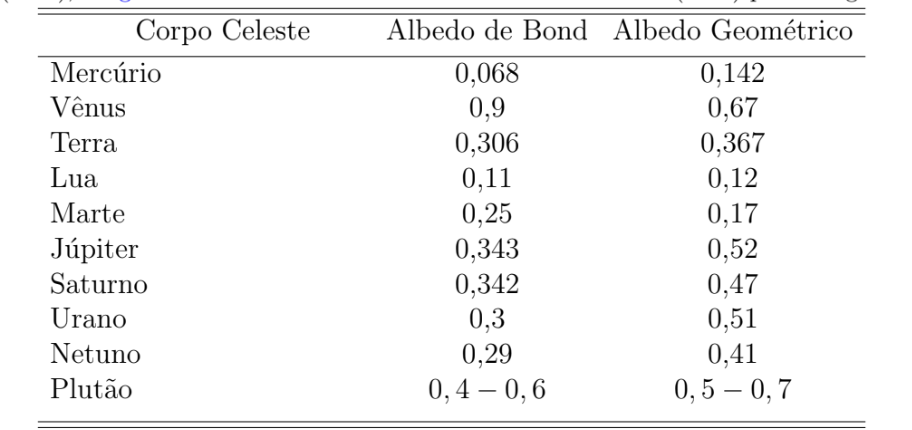

Como podemos ver pela tabela acima, o albedo de bond da Terra é de 0,306. Podemos implementar este valor através do fator $(1 - A_b)$ no primeiro termo da esquerda da equação. Por conseguinte, teremos:

$$\pi R^2_T (1-A_b) F_{ST} + 4 \pi R^2_T F_{int} = 4 \pi R^2_T F_{T}. \tag{5}$$

Isolando o fluxo terrestre:

$$F_T = \frac{(1-A_b)F_{ST}+4F_{int}}{4}. \tag{6}$$

Podemos aproximar o espectro de emissão da Terra pelo espectro de emissão de um corpo negro — um objeto teórico que absorve toda a radiação que nele incide, sem ser atravessado por ou refletir luz. Assim, cabe trazermos à tona a Lei de Stefan-Boltzmann, representada abaixo:

$$f = \sigma T^4_{ef}, \tag{7}$$

em que $T_{ef}$ é a temperatura efetiva, ou seja, a temperatura que um corpo negro teria caso tivesse irradiado o mesmo fluxo que o corpo real, $f$ é o fluxo e $\sigma$ a constante de Stefan-Boltzmann, de valor $5,67 \times 10^8 Jm^{-2}s^{-1}K^{-4}$. Assim, conseguimos escrever a nossa equação do fluxo da seguinte forma:

$$F_T = \frac{(1-A_b)F_{ST} + 4F_{int}}{4} = \sigma T^4_{ef}. \tag{8}$$

Isolando $T_{ef}$, obtemos:

$$T_{ef} = ( \frac{(1-A_b)F_{ST}+4 F_{int}}{4 \sigma} )^{ \frac{1}{4}}. \tag{9}$$

As fontes de energia da Terra totalizam $\approx$ 0,025% do total de radiação absorvida do sol, podendo ser desprezadas em primeira aproximação. Assim, usando a tabela do albedo de bond:

$$T_{ef} = ( \frac{(1-A_b)F_{ST}}{4 \sigma} )^{ \frac{1}{4}} = 254,5K = -18,7  ^oC.$$

Mesmo sendo uma média de todas as temperaturas do planeta, desde as baixas temperaturas das zonas polares às altas dos trópicos, passando pelas diferenças térmicas entre o dia e a noite e pelas diferenças sazonais, essa temperatura ainda ́e muito baixa. A ́agua do planeta estaria congelada. Além disso, sabemos que a temperatura média da Terra é de 288K = 15°C.

Essa diferença de aproximadamente 34°C vem do efeito estufa na atmosfera da Terra. O solo e a atmosfera absorvem cerca de 69% da radiação solar incidente, e irradiam esta energia em sua maioria no espectro infravermelho. Já os gases estufa, como vapor d'água e dióxido de carbono, absorvem parte dessa radiação térmica e a reemitem em todas as direções — incluindo o solo, que é reaquecido. O efeito global desse aquecimento pelo 
efeito estufa ão ée percebido na poênncia total irradiada pela Terra, áa que a Terra esáa e 
equí́ıbrio com o quanto de radçã̃ao que recebe do Sol. Em caso de desequí́ıbrio, haver a
aquecimento ou resfriamento do planeta. O efeito estufa pode ser entendido, ãõao, c mo
um isolante, um agente queém ́em energia na Terra por mais tempo antes dela ser irradiada.

O efeito estufa pode ser implementado no modelo utilizando-se uma nova variável, a emissividade $\epsilon$, que é a razão entre o fluxo real emitido e o fluxo de um corpo negro à mesma temperatura que um corpo real. Diferentes materiais têm diferentes emissividades, que podem inclusive variar com o comprimento de onda e a temperatura. Quanto melhor emissor for o corpo, mais próxima de 1 será sua emissividade; quanto pior, mais próxima de zero. Um corpo negro tem $\epsilon = 1$, e corpos reais têm $0 < \epsilon < 1$.

A emmissividade da Terra sem atmosfera seria próxima de 1, mas as nuvens e os gases absorvem e reemitem a energia do solo, resultando em uma emissividade $\epsilon \approx 0,5$. Supondo em primeira aproximação que água, neve, solo e nuvens perfaçam a Terra visível em partes iguais, a emissividade efetiva será de $\epsilon \approx 0,55 — 0,65$. Acrescentando esse fator no lado direito da nossa equação, obtemos:

$$T_{ef} = ( \frac{(1-A_b)F_{ST}}{4 \sigma \epsilon} )^{ \frac{1}{4}} = 289,1K - 283,4K = 22 - 10 ^oC = 12 ^oC,$$

que é um valor consideravelmente mais próximo de 15°C, a temperatura média da Terra estabelecida previamente. Este *toy model* é bastante simples e consideravelmente limitado, porém esclarecedor e razoavelmente preciso numericamente. No entanto, a variável $\epsilon$ não informa a origem ou estado do efeito estufa no planeta, somente sua existência, também não incluindo nenhuma descrição refinada da atmosfera. Mesmo assim, podemos utilizar este modelo zerodimensional para modelar uma zona de habitabilidade circunstelar. Para fazer isso, precisamos levar em consideração o fato de que o fluxo solar varia com a distância ao sol, e a irradiação a um corpo mais próximo do Sol seria maior do que a de um corpo distante. Sabendo que o fluxo se relaciona com a luminosidade, podemos substituir o fator $F_{ST}$ na equação acima por $L_S/4 \pi D^2$, que depende da distância, $D$, à fonte, o sol.

$$T_{ef} = ( \frac{(1-A_b)L_S}{16 \pi \sigma \epsilon D^2} )^{ \frac{1}{4}}. \tag{10}$$

Para descobrir a ZHC do Sistema Solar, basta isolar $D$ na equação anterior:

$$D = ( \frac{(1-A_b)L_S}{16 \pi \sigma \epsilon T_{ef}^4})^{ \frac{1}{2}}, \tag{11}$$

e substituir $T_{ef}$ por 273K e 373K para delimitar a região. O resultado é que a ZHC atual do Sistema Solar estaria situada entre $\approx$ 0,6 e $\approx$ 1,1 UA, usando a emissividade terrestre.

Assim, conseguimos plotar a ZHC ao redor do Sol para um planeta como a Terra.

## Extensão da ZHC

Vale à pena frisar que o resultado anterior dos limites da ZHC foi obtido modelando um planeta com a atmosfera como a da Terra, porém outros tipos de atmosferas podem ser modeladas variando $A_b$ e $\epsilon$, o que alteraria consideravelmente os resultados.

Uma primeira tentativa de modelar um planeta que suportaria melhor alta insolação e permenecesse habitável mesmo numa órbita mais interna à terrestre seria algo como Marte, por ter uma atmosfera tênue que não possui extenso efeito estufa. No outro extremo, teríamos algo como Vênus, cujo efeito estufa é bastante exacerbado. No caso, Marte atualmente tem pressão atmosférica baixa demais para suportar água líquida em sua superfície. Como em nosso *toy model* não há informação sobre pressão atmosférica, supomos sempre 1 ATM.

Isolando $\epsilon$ na equação (9) e inserindo os parâmetros de temperatura superficial média e o albedo de Bond para Marte e Vênus, presentes na tabela acima, encontramos uma emissividade bastante alta para Marte, de $\approx 0,99$, e uma extremamente baixa para Vênus, de $\approx 0,004$. Isso reflete exatamente o que era esperado, visto que um tem um efeito estufa extremamente pronunciado enquanto o outro possui um efeito estufa mínimo.

Vamos, então, construir um gráfico para a temperatura efetiva de cada planeta em função da distância do sol!

In [3]:
#definindo constantes

ksb = 5.67e-8 #cte de stefan-boltzmann
Ls = 3.846e26 #luminosidade solar atual

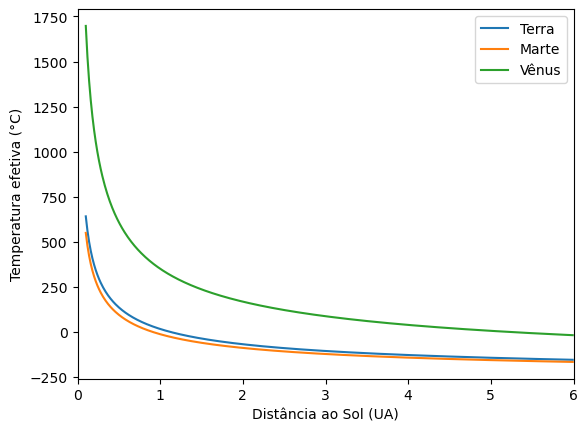

In [4]:
#vamos definir uma função para encontrar a temperatura efetiva
def T(ab,emi,D):
    ua = 1.496e11
    return (((1 - ab)*Ls)/(16*pi*ksb*emi*(D*ua)**2))**(1/4)

#TERRA
Tab = 0.306
Temi = 0.6
xt = arange(0.1,6,0.01)
yt = T(Tab,Temi,xt) - 273

#MARTE
Mab = 0.25
Memi = 0.99
xm = arange(0.1,6,0.01)
ym = T(Mab,Memi,xm) - 273

#VENUS
Vab = 0.9
Vemi = 0.004
xv = arange(0.1,6,0.01)
yv = T(Vab,Vemi,xv) - 273

#plotando o gráfico
plt.xlim(0,6)
plt.xlabel("Distância ao Sol (UA)")
plt.ylabel("Temperatura efetiva (°C)")
plt.plot(xt, yt, label='Terra')
plt.plot(xm, ym, label='Marte')
plt.plot(xv, yv, label='Vênus')
plt.legend()

Vamos agora dar um "zoom" no nosso gráfico, plotando os pontos correspondentes às atuais distâncias em relação ao sol e temperaturas efetivas de cada planeta.

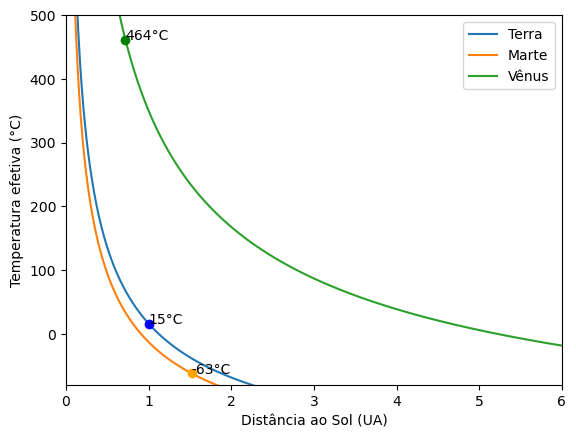

In [5]:
#plotando o gráfico
plt.ylim(-80,500)
plt.xlim(0,6)
plt.xlabel("Distância ao Sol (UA)")
plt.ylabel("Temperatura efetiva (°C)")

plt.plot(xt, yt, label='Terra')
plt.plot(xm, ym, label='Marte')
plt.plot(xv, yv, label='Vênus')
plt.plot(1,T(Tab,Temi,1) - 273,'o', color='blue')
plt.plot(1.52,T(Mab,Memi,1.52) - 273,'o',color='orange')
plt.plot(0.72,T(Vab,Vemi,0.72) - 273,'o', color='green')
plt.text(1,T(Tab,Temi,1) - 273, '15°C')
plt.text(1.52,T(Mab,Memi,1.52) - 273, '-63°C')
plt.text(0.72,T(Vab,Vemi,0.72) - 273, '464°C')
plt.legend()

Observando o gráfico, podemos perceber que o modelo de Vênus se manteria em temperaturas acima do congelamento mesmo em distâncias como 5,2 UA. Sua contraparte, Marte, estaria a 100°C de $T_{ef}$ em $\approx$ 0,5 UA. Ou seja, um planeta como Vênus, posto em uma órbita mais distante do Sol, poderia ter temperaturas amenas na superfície. E um planeta como Marte, posto mais próximo ao Sol, também poderia ter temperaturas mais amenas em sua superfície. Com isso já podemos perceber que os limites  da ZHC podem variar muito dependendo dos pressupostos.

Ambos Vênus e Marte, porém, encontram-se fora de suas atuais ZHCs. Isso nos leva a considerar o fato de que talvez a evolução temporal da ZHC e do próprio planeta e sua atmosfera seriam de grande interesse no estudo dos limites da ZHC.

## ZHC no tempo

A luminosidade solar aumenta com o tempo — consequentemente, isso faz com que a ZHC se desloque para fora, para longe do sol, ao mesmo tempo que fica mais larga. Isso cria o conceito de uma ZHC contínua, a região espacial ao redor de uma estrela que sempre permanece dentro de uma ZHC. Essa região é menor do que a ZHC ou até mesmo inexistente, quando o limite interior da ZHC se deslocar além do limite exterior inicial.

A luminosidade inicial do Sol quando começou a realizar uma fusão estável de hidrogênio em seu núcleo era algo entre 25 e 30% menor que a atual. Podemos descrever aproximadamente a evolução temporal desta luminosidade utilizando a seguinte relação:

$$L(t) = [1 + 0,4 (1 - \frac{t}{t_0})]^{-1}L_0, \tag{12}$$

onde $L_0$ é a luminosidade atual e $t_0$ é o tempo atual de 4,6 giga-anos. Inserindo a equação (12) como o termo da luminosidade $L_S$ na equação (10), mantendo as condições atuais de albedo e emissividade da Terra, obtemos a figura abaixo.

Text(4.6, 15.98503242754714, 'Terra Atual')

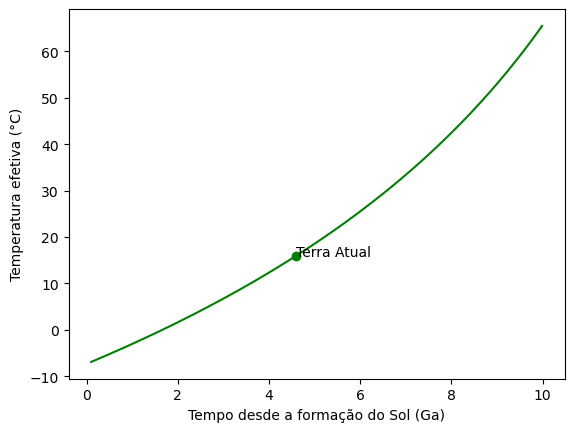

In [6]:
#vamos definir uma função para encontrar a temperatura efetiva levando em conta a evolução temporal da luminosidade solar
def TL(ab,emi,t):
    ua = 1.496e11
    t0 = 4.6
    Lt = (1 + 0.4*(1 - (t/t0)))**(-1)*Ls
    return (((1 - ab)*Lt)/(16*pi*ksb*emi*ua**2))**(1/4)

#TERRA
tempo = arange(0.1,10,0.01)
yy = TL(Tab,Temi,tempo) - 273

#plotando o gráfico
plt.xlabel("Tempo desde a formação do Sol (Ga)")
plt.ylabel("Temperatura efetiva (°C)")
plt.plot(tempo, yy, 'g')
plt.plot(4.6,TL(Tab,Temi,4.6) - 273,'o', color='green')
plt.text(4.6,TL(Tab,Temi,4.6) - 273, 'Terra Atual')

O primeiro resultado é que os primeiros 1,5 giga-anos da história natural da Terra seriam passados com as massas de água congeladas. Porém, isso não parece ter ocorrido — este paradoxo é conhecido como o problema do Sol Jovem Débil (*Faint Young Sun*). Uma das soluções para este problema é que a constituição da atmosfera nessa época seria diferente da atual, sustentando um efeito estufa maior.

## Conclusão

Nosso toy model é um tanto limitado, visto que não leva em conta a evolução temporal do albedo e emissividade do próprio planeta, as variações no efeito estufa, o impacto da própria vida na habitabilidade, entre outros fatores. Mesmo assim, é um modelo bastante interessante para "brincarmos" com e entendermos um pouco mais sobre o que afeta uma ZHC — e nos encoraja a aperfeiçoar cada vez mais nossa modelagem.

## Referências

[1] Mello, F. S., Zona de Habitabilidade Gal ́actica para Vida 
Simples e para Vida Complexa, 20
14
[2] Kasting J., Whitmire D., Reynolds R., Habitable Zones around Main Sequence Stars,
Icarus, 1993, vol. 101, p. 1
08
[3] de Pater I., Lissauer J., Planetary Sciences 2nd edn. Cambridge University Press Cam-
bridge, 2
01
[4] Atreya S., et al., Origin and Evolution of Planetary and Satellite Atmospheres. University
of Arizona Press Tucson, 19890